In [1]:
#import libraries
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

In [2]:
data=pd.read_csv("data.csv")

In [3]:
data.head()

,country,imports,exports,income,gdppc,inflation,health,child_mortality,total_fertility_rate,life_expectancy
0,Afghanistan,44.9,10.0,1610,553,9.44,7.58,90.2,5.82,56.2
1,Albania,48.6,28.0,9930,4090,4.49,6.55,16.6,1.65,76.3
2,Algeria,31.4,38.4,12900,4460,16.10,4.17,27.3,2.89,76.5
3,Angola,42.9,62.3,5900,3530,22.40,2.85,119.0,6.16,60.1
4,Antigua and Barbuda,58.9,45.5,19100,12200,1.44,6.03,10.3,2.13,76.8


In [4]:
data["id"] = data.index + 1
#index+1- id column

In [5]:
del data["country"]

In [6]:
data.head()

,imports,exports,income,gdppc,inflation,health,child_mortality,total_fertility_rate,life_expectancy,id
0,44.9,10.0,1610,553,9.44,7.58,90.2,5.82,56.2,1
1,48.6,28.0,9930,4090,4.49,6.55,16.6,1.65,76.3,2
2,31.4,38.4,12900,4460,16.10,4.17,27.3,2.89,76.5,3
3,42.9,62.3,5900,3530,22.40,2.85,119.0,6.16,60.1,4
4,58.9,45.5,19100,12200,1.44,6.03,10.3,2.13,76.8,5


In [7]:
data.describe()

,imports,exports,income,gdppc,inflation,health,child_mortality,total_fertility_rate,life_expectancy,id
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.00000
mean,46.890215,41.108976,17144.688623,12964.155689,7.781832,6.815689,38.270060,2.947964,70.555689,84.00000
std,24.209589,27.412010,19278.067698,18328.704809,10.570704,2.746837,40.328931,1.513848,8.893172,48.35287
min,0.065900,0.109000,609.000000,231.000000,-4.210000,1.810000,2.600000,1.150000,32.100000,1.00000
25%,30.200000,23.800000,3355.000000,1330.000000,1.810000,4.920000,8.250000,1.795000,65.300000,42.50000
50%,43.300000,35.000000,9960.000000,4660.000000,5.390000,6.320000,19.300000,2.410000,73.100000,84.00000
75%,58.750000,51.350000,22800.000000,14050.000000,10.750000,8.600000,62.100000,3.880000,76.800000,125.50000
max,174.000000,200.000000,125000.000000,105000.000000,104.000000,17.900000,208.000000,7.490000,82.800000,167.00000


In [8]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# statistics of scaled data
pd.DataFrame(data_scaled).describe()

,0,1,2,3,4,5,6,7,8,9
count,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02
mean,2.871954e-16,2.383323e-16,-7.512288e-17,2.127373e-17,8.376533e-17,5.218713e-16,-2.659217e-17,3.124580e-16,3.616535e-16,3.589943e-17
std,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00
min,-1.939940e+00,-1.500192e+00,-8.603259e-01,-6.968005e-01,-1.137852e+00,-1.827827e+00,-8.871383e-01,-1.191250e+00,-4.337186e+00,-1.721710e+00
25%,-6.914785e-01,-6.333367e-01,-7.174558e-01,-6.366596e-01,-5.666409e-01,-6.922106e-01,-7.466190e-01,-7.639023e-01,-5.927576e-01,-8.608551e-01
50%,-1.487432e-01,-2.235279e-01,-3.738080e-01,-4.544309e-01,-2.269504e-01,-1.810007e-01,-4.717981e-01,-3.564309e-01,2.869576e-01,0.000000e+00
75%,4.913530e-01,3.747198e-01,2.942370e-01,5.942100e-02,2.816364e-01,6.515412e-01,5.926666e-01,6.175252e-01,7.042584e-01,8.608551e-01
max,5.266181e+00,5.813835e+00,5.611542e+00,5.036507e+00,9.129718e+00,4.047436e+00,4.221297e+00,3.009349e+00,1.380962e+00,1.721710e+00


In [9]:
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=3, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(data_scaled)

KMeans(n_clusters=3)

In [10]:
kmeans.inertia_

998.0516098898086

Text(0, 0.5, 'Inertia')

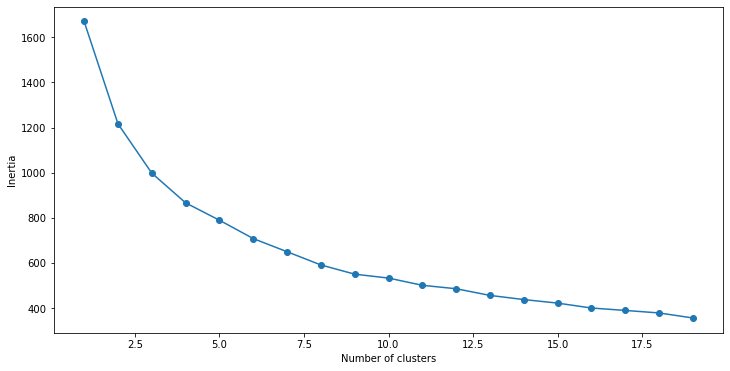

In [11]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(
        #n_jobs = -1, 
        n_clusters = cluster, 
        init='k-means++'
    )
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [12]:
# k means using 5 clusters and k-means++ initialization
kmeans = KMeans(n_clusters = 3, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

In [13]:
frame = pd.DataFrame(data_scaled)
frame["id"] = frame.index + 1
frame['cluster'] = pred
frame['cluster'].value_counts()

0    85
1    47
2    35
Name: cluster, dtype: int64

In [14]:
print(frame['cluster'])

0      1
1      0
2      0
3      1
4      0
      ..
162    0
163    0
164    0
165    1
166    1
Name: cluster, Length: 167, dtype: int32


In [15]:
import matplotlib.pyplot as plt

In [16]:
pred

array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 2,
       2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 2, 0, 0, 1, 1, 0,
       1, 0, 2, 0, 0, 0, 1, 2, 2, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       2, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 2, 2, 2, 0, 1, 2, 2, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1], dtype=int32)

In [17]:
u_labels = np.unique(pred)

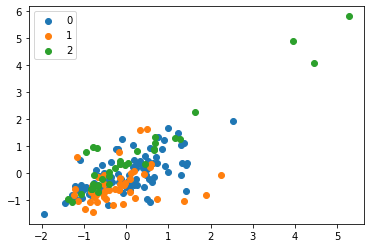

In [18]:
for i in u_labels:
    plt.scatter(data_scaled[pred == i , 0] , data_scaled[pred == i , 1] , label = i)
plt.legend()
plt.show()

In [19]:
print (frame[frame.cluster == 1].shape[0])

47


In [20]:
OriginalData = pd.read_csv("data.csv")

In [21]:
data_o=pd.read_csv("data.csv")

In [22]:
data_o["id"] = data_o.index + 1

In [23]:
df3=pd.merge(data_o,frame,on="id")

In [24]:
df3

,country,imports,exports,income,gdppc,inflation,health,child_mortality,total_fertility_rate,life_expectancy,...,1,2,3,4,5,6,7,8,9,cluster
0,Afghanistan,44.9,10.0,1610,553,9.44,7.58,90.2,5.82,56.2,...,-1.138280,-0.808245,-0.679180,0.157336,0.279088,1.291532,1.902882,-1.619092,-1.721710,1
1,Albania,48.6,28.0,9930,4090,4.49,6.55,16.6,1.65,76.3,...,-0.479658,-0.375369,-0.485623,-0.312347,-0.097016,-0.538949,-0.859973,0.647866,-1.700967,0
2,Algeria,31.4,38.4,12900,4460,16.10,4.17,27.3,2.89,76.5,...,-0.099122,-0.220844,-0.465376,0.789274,-0.966073,-0.272833,-0.038404,0.670423,-1.680223,0
3,Angola,42.9,62.3,5900,3530,22.40,2.85,119.0,6.16,60.1,...,0.775381,-0.585043,-0.516268,1.387054,-1.448071,2.007808,2.128151,-1.179234,-1.659480,1
4,Antigua and Barbuda,58.9,45.5,19100,12200,1.44,6.03,10.3,2.13,76.8,...,0.160668,0.101732,-0.041817,-0.601749,-0.286894,-0.695634,-0.541946,0.704258,-1.638736,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,52.7,46.6,2950,2970,2.62,5.25,29.2,3.50,63.0,...,0.200917,-0.738527,-0.546913,-0.489784,-0.571711,-0.225578,0.365754,-0.852161,1.638736,0
163,Venezuela,17.6,28.5,16500,13500,45.90,4.91,17.1,2.47,75.4,...,-0.461363,-0.033542,0.029323,3.616865,-0.695862,-0.526514,-0.316678,0.546361,1.659480,0
164,Vietnam,80.2,72.0,4490,1310,12.10,6.84,23.3,1.95,73.1,...,1.130305,-0.658404,-0.637754,0.409732,0.008877,-0.372315,-0.661206,0.286958,1.680223,0
165,Yemen,34.4,30.0,4480,1310,23.60,5.18,56.3,4.67,67.5,...,-0.406478,-0.658924,-0.637754,1.500916,-0.597272,0.448417,1.140944,-0.344633,1.700967,1


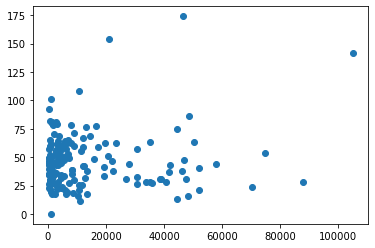

In [25]:
plt.scatter(df3['gdppc'], df3['imports'])
plt.show()

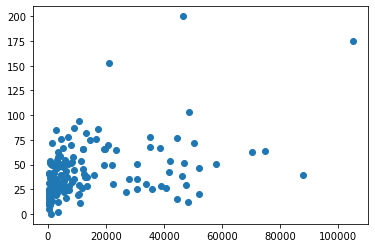

In [26]:
plt.scatter(df3['gdppc'], df3['exports'])
plt.show()

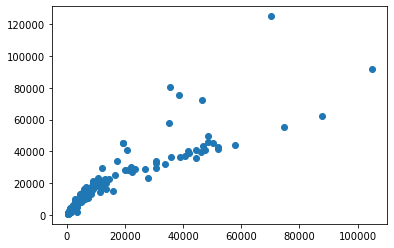

In [27]:
plt.scatter(df3['gdppc'], df3['income'])
plt.show()

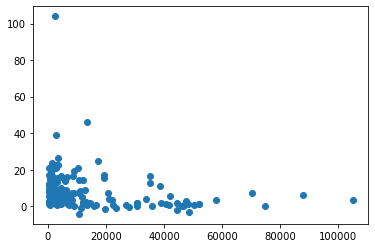

In [28]:
plt.scatter(df3['gdppc'], df3['inflation'])
plt.show()

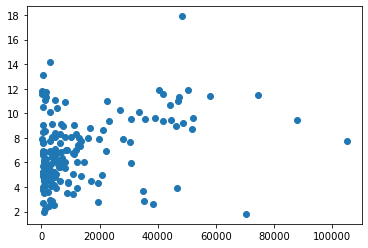

In [29]:
plt.scatter(df3['gdppc'], df3['health'])
plt.show()

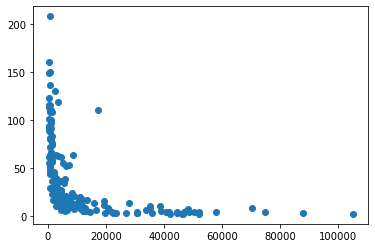

In [30]:
plt.scatter(df3['gdppc'], df3['child_mortality'])
plt.show()

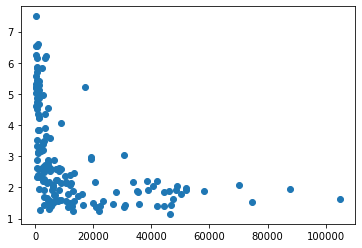

In [31]:
plt.scatter(df3['gdppc'], df3['total_fertility_rate'])
plt.show()

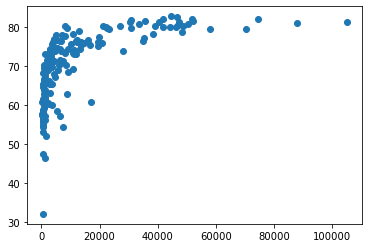

In [32]:
plt.scatter(df3['gdppc'], df3['life_expectancy'])
plt.show()

In [33]:
#only income and life expectancy have a good relationship with gdppc

In [34]:
cluster0=df3[df3["cluster"] == 0]

In [35]:
cluster0

,country,imports,exports,income,gdppc,inflation,health,child_mortality,total_fertility_rate,life_expectancy,...,1,2,3,4,5,6,7,8,9,cluster
1,Albania,48.6,28.0,9930,4090,4.49,6.55,16.6,1.65,76.3,...,-0.479658,-0.375369,-0.485623,-0.312347,-0.097016,-0.538949,-0.859973,0.647866,-1.700967,0
2,Algeria,31.4,38.4,12900,4460,16.10,4.17,27.3,2.89,76.5,...,-0.099122,-0.220844,-0.465376,0.789274,-0.966073,-0.272833,-0.038404,0.670423,-1.680223,0
4,Antigua and Barbuda,58.9,45.5,19100,12200,1.44,6.03,10.3,2.13,76.8,...,0.160668,0.101732,-0.041817,-0.601749,-0.286894,-0.695634,-0.541946,0.704258,-1.638736,0
5,Argentina,16.0,18.9,18700,10300,20.90,8.10,14.5,2.37,75.8,...,-0.812628,0.080920,-0.145791,1.244725,0.468966,-0.591177,-0.382933,0.591474,-1.617993,0
6,Armenia,45.3,20.8,6700,3220,7.77,4.40,18.1,1.69,73.3,...,-0.743107,-0.543421,-0.533233,-0.001123,-0.882089,-0.501643,-0.833471,0.309514,-1.597249,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,Uruguay,25.4,26.3,17100,11900,4.91,8.35,10.6,2.08,76.4,...,-0.541862,-0.002325,-0.058234,-0.272496,0.560254,-0.688173,-0.575074,0.659145,1.597249,0
161,Uzbekistan,28.5,31.7,4240,1380,16.50,5.81,36.3,2.34,68.8,...,-0.344275,-0.671411,-0.633923,0.827229,-0.367227,-0.048997,-0.402810,-0.198014,1.617993,0
162,Vanuatu,52.7,46.6,2950,2970,2.62,5.25,29.2,3.50,63.0,...,0.200917,-0.738527,-0.546913,-0.489784,-0.571711,-0.225578,0.365754,-0.852161,1.638736,0
163,Venezuela,17.6,28.5,16500,13500,45.90,4.91,17.1,2.47,75.4,...,-0.461363,-0.033542,0.029323,3.616865,-0.695862,-0.526514,-0.316678,0.546361,1.659480,0


In [36]:
mean_0 = cluster0["life_expectancy"].mean()

In [37]:
mean_0

72.85176470588235

In [38]:
cluster1 = df3[df3["cluster"] == 1]

In [39]:
cluster1

,country,imports,exports,income,gdppc,inflation,health,child_mortality,total_fertility_rate,life_expectancy,...,1,2,3,4,5,6,7,8,9,cluster
0,Afghanistan,44.9,10.00,1610,553,9.440,7.58,90.2,5.82,56.2,...,-1.138280,-0.808245,-0.679180,0.157336,0.279088,1.291532,1.902882,-1.619092,-1.721710,1
3,Angola,42.9,62.30,5900,3530,22.400,2.85,119.0,6.16,60.1,...,0.775381,-0.585043,-0.516268,1.387054,-1.448071,2.007808,2.128151,-1.179234,-1.659480,1
17,Benin,37.2,23.80,1820,758,0.885,4.10,111.0,5.36,61.8,...,-0.633337,-0.797319,-0.667961,-0.654410,-0.991634,1.808842,1.598107,-0.987502,-1.369071,1
21,Botswana,51.3,43.60,13300,6350,8.920,8.30,52.5,2.88,57.1,...,0.091147,-0.200033,-0.361949,0.107996,0.541996,0.353908,-0.045030,-1.517586,-1.286097,1
25,Burkina Faso,29.6,19.20,1430,575,6.810,6.74,116.0,5.87,57.9,...,-0.801651,-0.817611,-0.677976,-0.092213,-0.027638,1.933196,1.936010,-1.427359,-1.203123,1
26,Burundi,39.2,8.92,764,231,12.300,11.60,93.6,6.26,57.7,...,-1.177797,-0.852261,-0.696801,0.428709,1.746991,1.376093,2.194407,-1.449916,-1.182379,1
28,Cameroon,27.0,22.20,2660,1310,1.910,5.13,108.0,5.11,57.3,...,-0.691881,-0.753616,-0.637754,-0.557152,-0.615529,1.734230,1.432468,-1.495030,-1.140892,1
31,Central African Republic,26.5,11.80,888,446,2.010,3.98,149.0,5.21,47.5,...,-1.072418,-0.845810,-0.685035,-0.547664,-1.035452,2.753928,1.498724,-2.600313,-1.078662,1
32,Chad,43.5,36.80,1930,897,6.390,4.53,150.0,6.59,56.5,...,-0.157666,-0.791596,-0.660355,-0.132065,-0.834619,2.778798,2.413050,-1.585257,-1.057918,1
36,Comoros,51.7,16.50,1410,769,3.870,4.51,88.2,4.75,65.9,...,-0.900444,-0.818651,-0.667359,-0.371177,-0.841922,1.241791,1.193948,-0.525087,-0.974944,1


In [40]:
cluster2=df3[df3["cluster"] == 2]

In [41]:
cluster2.head()

,country,imports,exports,income,gdppc,inflation,health,child_mortality,total_fertility_rate,life_expectancy,...,1,2,3,4,5,6,7,8,9,cluster
7,Australia,20.9,19.8,41400,51900,1.160,8.73,4.8,1.93,82.0,...,-0.779697,1.261966,2.130699,-0.628316,0.699011,-0.832423,-0.674457,1.290735,-1.576506,2
8,Austria,47.8,51.3,43200,46900,0.873,11.00,4.3,1.44,80.5,...,0.372890,1.355617,1.857082,-0.655549,1.527901,-0.844858,-0.999109,1.121559,-1.555762,2
15,Belgium,74.7,76.4,41100,44400,1.880,10.70,4.5,1.86,80.0,...,1.291301,1.246357,1.720274,-0.559999,1.418356,-0.839884,-0.720836,1.065167,-1.410558,2
23,Brunei,28.0,67.4,80600,35300,16.700,2.84,10.5,1.84,77.1,...,0.961991,3.301480,1.222291,0.846206,-1.451722,-0.690660,-0.734087,0.738094,-1.244610,2
29,Canada,31.0,29.1,40700,47400,2.870,11.30,5.6,1.63,81.3,...,-0.439409,1.225546,1.884444,-0.466062,1.637446,-0.812526,-0.873224,1.211786,-1.120149,2


In [42]:
gdppc_mean_0 = cluster0["gdppc"].mean()
gdppc_mean_1 = cluster1["gdppc"].mean()
gdppc_mean_2 = cluster2["gdppc"].mean()

In [43]:
gdppc_mean_0

6653.670588235294

In [44]:
gdppc_mean_1

1922.3829787234042

In [45]:
gdppc_mean_2

43117.142857142855

In [46]:
life_expectancy_mean_0 = cluster0["life_expectancy"].mean()
life_expectancy_mean_1 = cluster1["life_expectancy"].mean()
life_expectancy_mean_2 = cluster2["life_expectancy"].mean()

In [47]:
life_expectancy_mean_0

72.85176470588235

In [48]:
life_expectancy_mean_1

59.187234042553186

In [49]:
life_expectancy_mean_2

80.24571428571429

In [50]:
income_mean_0 = cluster0["income"].mean()
income_mean_1 = cluster1["income"].mean()
income_mean_2 = cluster2["income"].mean()

In [51]:
income_mean_0

12644.35294117647

In [52]:
income_mean_1

3942.404255319149

In [53]:
income_mean_2

45802.857142857145

In [54]:
score_cluster_0 = 0
score_cluster_1 = 0
score_cluster_2 = 0

In [55]:
#gdppc
if gdppc_mean_0 < gdppc_mean_1 and gdppc_mean_0 < gdppc_mean_2 :
    score_cluster_0= score_cluster_0+2
if gdppc_mean_1 < gdppc_mean_0 and gdppc_mean_1 < gdppc_mean_2 :
    score_cluster_1= score_cluster_1+2
if gdppc_mean_2 < gdppc_mean_0 and gdppc_mean_2 < gdppc_mean_1 :
    score_cluster_2= score_cluster_2+2

In [56]:
#life expectency
if life_expectancy_mean_0 < life_expectancy_mean_1 and life_expectancy_mean_0 < life_expectancy_mean_2 :
    score_cluster_0= score_cluster_0+1
if life_expectancy_mean_1 < life_expectancy_mean_0 and life_expectancy_mean_1 < life_expectancy_mean_2 :
    score_cluster_1= score_cluster_1+1
if life_expectancy_mean_2 < life_expectancy_mean_0 and life_expectancy_mean_2 < life_expectancy_mean_1 :
    score_cluster_2= score_cluster_2+1

In [57]:
#income
if income_mean_0 < income_mean_1 and income_mean_0 < income_mean_2 :
    score_cluster_0= score_cluster_0+1
if income_mean_1 < income_mean_0 and income_mean_1 < income_mean_2 :
    score_cluster_1= score_cluster_1+1
if income_mean_2 < income_mean_0 and income_mean_2 < income_mean_1 :
    score_cluster_2= score_cluster_2+1

In [58]:
#deciding under developed cluster
if score_cluster_0 > score_cluster_1 and score_cluster_0 > score_cluster_2 :
    u_d_cluster = cluster0
if score_cluster_1 > score_cluster_0 and score_cluster_1 > score_cluster_2 :
    u_d_cluster = cluster1
if score_cluster_2 > score_cluster_0 and score_cluster_2 > score_cluster_1 :
    u_d_cluster = cluster2

In [59]:
cluster2

,country,imports,exports,income,gdppc,inflation,health,child_mortality,total_fertility_rate,life_expectancy,...,1,2,3,4,5,6,7,8,9,cluster
7,Australia,20.9,19.8,41400,51900,1.160,8.73,4.8,1.93,82.0,...,-0.779697,1.261966,2.130699,-0.628316,0.699011,-0.832423,-0.674457,1.290735,-1.576506,2
8,Austria,47.8,51.3,43200,46900,0.873,11.00,4.3,1.44,80.5,...,0.372890,1.355617,1.857082,-0.655549,1.527901,-0.844858,-0.999109,1.121559,-1.555762,2
15,Belgium,74.7,76.4,41100,44400,1.880,10.70,4.5,1.86,80.0,...,1.291301,1.246357,1.720274,-0.559999,1.418356,-0.839884,-0.720836,1.065167,-1.410558,2
23,Brunei,28.0,67.4,80600,35300,16.700,2.84,10.5,1.84,77.1,...,0.961991,3.301480,1.222291,0.846206,-1.451722,-0.690660,-0.734087,0.738094,-1.244610,2
29,Canada,31.0,29.1,40700,47400,2.870,11.30,5.6,1.63,81.3,...,-0.439409,1.225546,1.884444,-0.466062,1.637446,-0.812526,-0.873224,1.211786,-1.120149,2
42,Cyprus,57.5,50.2,33900,30800,2.010,5.97,3.6,1.42,79.9,...,0.332641,0.871752,0.976037,-0.547664,-0.308803,-0.862268,-1.012361,1.053889,-0.850483,2
43,Czech Republic,62.9,66.0,28300,19800,-1.430,7.88,3.4,1.51,77.5,...,0.910764,0.580393,0.374080,-0.874070,0.388633,-0.867242,-0.952731,0.783207,-0.829740,2
44,Denmark,43.6,50.5,44000,58000,3.220,11.40,4.1,1.87,79.5,...,0.343618,1.397240,2.464511,-0.432852,1.673961,-0.849832,-0.714211,1.008775,-0.808996,2
53,Finland,37.4,38.7,39800,46200,0.351,8.95,3.0,1.87,80.0,...,-0.088145,1.178720,1.818776,-0.705079,0.779344,-0.877190,-0.714211,1.065167,-0.622305,2
54,France,28.1,26.8,36900,40600,1.050,11.90,4.2,2.03,81.4,...,-0.523567,1.027838,1.512325,-0.638754,1.856536,-0.847345,-0.608202,1.223065,-0.601561,2


In [60]:
mean_2 = cluster2["life_expectancy"].mean()

In [61]:
u_d_cluster

,country,imports,exports,income,gdppc,inflation,health,child_mortality,total_fertility_rate,life_expectancy,...,1,2,3,4,5,6,7,8,9,cluster
0,Afghanistan,44.9,10.00,1610,553,9.440,7.58,90.2,5.82,56.2,...,-1.138280,-0.808245,-0.679180,0.157336,0.279088,1.291532,1.902882,-1.619092,-1.721710,1
3,Angola,42.9,62.30,5900,3530,22.400,2.85,119.0,6.16,60.1,...,0.775381,-0.585043,-0.516268,1.387054,-1.448071,2.007808,2.128151,-1.179234,-1.659480,1
17,Benin,37.2,23.80,1820,758,0.885,4.10,111.0,5.36,61.8,...,-0.633337,-0.797319,-0.667961,-0.654410,-0.991634,1.808842,1.598107,-0.987502,-1.369071,1
21,Botswana,51.3,43.60,13300,6350,8.920,8.30,52.5,2.88,57.1,...,0.091147,-0.200033,-0.361949,0.107996,0.541996,0.353908,-0.045030,-1.517586,-1.286097,1
25,Burkina Faso,29.6,19.20,1430,575,6.810,6.74,116.0,5.87,57.9,...,-0.801651,-0.817611,-0.677976,-0.092213,-0.027638,1.933196,1.936010,-1.427359,-1.203123,1
26,Burundi,39.2,8.92,764,231,12.300,11.60,93.6,6.26,57.7,...,-1.177797,-0.852261,-0.696801,0.428709,1.746991,1.376093,2.194407,-1.449916,-1.182379,1
28,Cameroon,27.0,22.20,2660,1310,1.910,5.13,108.0,5.11,57.3,...,-0.691881,-0.753616,-0.637754,-0.557152,-0.615529,1.734230,1.432468,-1.495030,-1.140892,1
31,Central African Republic,26.5,11.80,888,446,2.010,3.98,149.0,5.21,47.5,...,-1.072418,-0.845810,-0.685035,-0.547664,-1.035452,2.753928,1.498724,-2.600313,-1.078662,1
32,Chad,43.5,36.80,1930,897,6.390,4.53,150.0,6.59,56.5,...,-0.157666,-0.791596,-0.660355,-0.132065,-0.834619,2.778798,2.413050,-1.585257,-1.057918,1
36,Comoros,51.7,16.50,1410,769,3.870,4.51,88.2,4.75,65.9,...,-0.900444,-0.818651,-0.667359,-0.371177,-0.841922,1.241791,1.193948,-0.525087,-0.974944,1


In [62]:
country_column = u_d_cluster.loc[:,'country']

In [63]:
countries = country_column.values

In [64]:
countries

array(['Afghanistan', 'Angola', 'Benin', 'Botswana', 'Burkina Faso',
       'Burundi', 'Cameroon', 'Central African Republic', 'Chad',
       'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire",
       'Equatorial Guinea', 'Eritrea', 'Gabon', 'Gambia', 'Ghana',
       'Guinea', 'Guinea-Bissau', 'Haiti', 'Iraq', 'Kenya', 'Kiribati',
       'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali',
       'Mauritania', 'Mozambique', 'Namibia', 'Niger', 'Nigeria',
       'Pakistan', 'Rwanda', 'Senegal', 'Sierra Leone', 'South Africa',
       'Sudan', 'Tanzania', 'Timor-Leste', 'Togo', 'Uganda', 'Yemen',
       'Zambia'], dtype=object)

In [65]:
textfile= open("outcomes.txt","w+")
textfile.write('No. of under-developing countries : ')
NoOfCountries=u_d_cluster.shape[0]
textfile.write(str(NoOfCountries))
textfile.write('\n')

1

In [66]:
textfile.write('Under-developing countries: ')
textfile.write('[')

1

In [67]:
with open('outcomes.txt', 'a') as filehandle:
    #textfile.write (', \'' .join(countries).'\'')
    #textfile.write (', '.join(f'"{w}"' for w in countries))
    textfile.write ("'"+"','".join(countries)+"'")
    #for listitem in countries:
       #textfile.write (',' .join(countries))
       #textfile.write( "'" + listitem +"', ") 
textfile.write("]")


1

In [68]:
textfile.write('\n')
textfile.write('The no. of vaccines a country would receive: ')
NoOfVaccines = 20000000
OneCountry = NoOfVaccines/NoOfCountries
OneCountryR=round(OneCountry)
textfile.write(str(OneCountryR))
textfile.write('\n')

1

In [69]:
textfile.close()